In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

# Summary Statistics and Creating a new Column (Impact)

In [3]:
ph=pd.read_csv('enchanted_festival_photos.csv')
ph.head()

,Email_ID,Photo_Name,Open_Rate,Click_Through_Rate,Conversion,Engagement_Time,Bounce_Rate,Recipient_Age_Group,Device_Type,Photo_Rating,Time_of_Day,Season_Pass_Holder
0,1,Elf Point,No,Yes,No,73.0,Yes,45-54,Desktop,8,Morning,Yes
1,2,Elf Point,Yes,Yes,Yes,30.8,Yes,45-54,Mobile,10,Afternoon,Yes
2,3,Ice Slide,Yes,No,No,107.7,No,45-54,Tablet,7,Evening,No
3,4,Bonhomme,Yes,Yes,Yes,37.2,Yes,25-34,Desktop,4,Morning,Yes
4,5,Bonhomme,No,Yes,No,81.6,Yes,45-54,Desktop,4,Morning,No


In [4]:
ph.isna().sum()

Email_ID               0
Photo_Name             0
Open_Rate              0
Click_Through_Rate     0
Conversion             0
Engagement_Time        0
Bounce_Rate            0
Recipient_Age_Group    0
Device_Type            0
Photo_Rating           0
Time_of_Day            0
Season_Pass_Holder     0
dtype: int64

In [5]:
ph.groupby('Photo_Name')['Email_ID'].count()

Photo_Name
Bonhomme           374
Elf Point          387
Harbin Ice City    382
Ice Slide          417
Name: Email_ID, dtype: int64

'Ice Slide' is the most Frequent Value in the dataset. Therefore, it has a slight advantage among other Photos, since it has a little bit more data. While this does not necessarily mean 'Ice Slide' is the best performing photo, the higher frequency of its appearance can help provide more reliable insights and strengthen the statistical results.

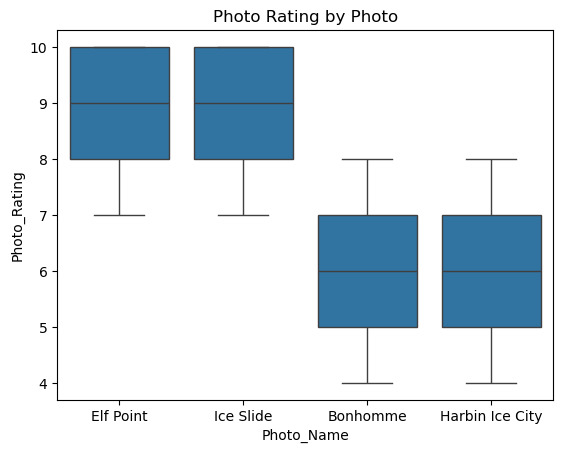

In [7]:
sns.boxplot(x='Photo_Name', y='Photo_Rating', data=ph);
plt.title('Photo Rating by Photo');

The boxplot analysis reveals interesting insights into the distribution of ratings for each photo. 'Elf Point' and 'Ice Slide' have the highest average ratings, consistently around 9, and both exhibit a narrow rating range, typically between 8 and 10, with occasional dips to 7. This indicates that most recipients gave these photos very positive ratings, with few extreme ratings.

In contrast, 'Bonhomme' and 'Harbin Ice City' received lower average ratings of around 6, with a wider rating range fluctuating between 5 and 7, occasionally dipping as low as 4 or rising to 8. This suggests a more mixed reception, with some recipients showing less enthusiasm for these photos.

In summary, 'Elf Point' and 'Ice Slide' are favored by the audience with higher and more consistent ratings, while 'Bonhomme' and 'Harbin Ice City' received more varied and lower ratings overall. This reinforces the idea that 'Ice Slide' might be the most popular choice, as it also shows the highest observed conversion rate, along with strong engagement.

In [9]:
ph.groupby('Photo_Name')['Engagement_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Photo_Name,,,,,,,,
Bonhomme,374.0,49.060160,23.568708,10.1,28.65,49.15,70.325,89.7
Elf Point,387.0,69.240568,29.068364,20.2,44.15,70.10,93.500,119.9
Harbin Ice City,382.0,48.565445,23.689299,10.1,27.40,47.45,70.100,89.8
Ice Slide,417.0,73.116307,28.239336,20.3,50.70,73.20,98.500,120.0


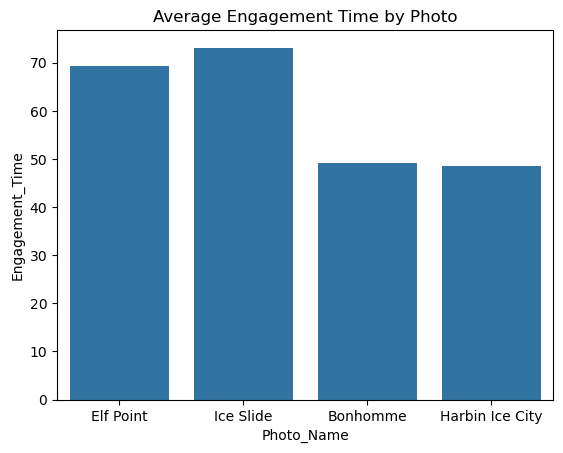

In [10]:
sns.barplot(x='Photo_Name', y='Engagement_Time', errorbar=None, data=ph);
plt.title('Average Engagement Time by Photo');

The analysis of Average Engagement Time highlights similar trends to the rating analysis. 'Ice Slide' leads with the longest engagement time, exceeding 70 seconds on average, followed closely by 'Elf Point' with almost 70 seconds. In contrast, 'Harbin Ice City' and 'Bonhomme' have significantly lower engagement times, both under 50 seconds on average.

Additionally, the summary statistics above the barplot points that the range of engagement time is broader for 'Elf Point' and 'Ice Slide,' with the minimum time at 20 seconds and the maximum time reaching up to 120 seconds. This suggests that these photos not only capture attention for a longer period but also see a wider variation in how long recipients engage with the content.

In order to determine which photo performs the best, a new column called 'Impact' was created. The 'Impact' column was calculated by dividing the Photo Rating by the Engagement Time for each recipient. This approach helps quantify the effectiveness of each photo by considering both how highly it was rated and how long recipients engaged with it.

In [13]:
ph['Impact']=ph['Photo_Rating']/ph['Engagement_Time']
ph.head()

,Email_ID,Photo_Name,Open_Rate,Click_Through_Rate,Conversion,Engagement_Time,Bounce_Rate,Recipient_Age_Group,Device_Type,Photo_Rating,Time_of_Day,Season_Pass_Holder,Impact
0,1,Elf Point,No,Yes,No,73.0,Yes,45-54,Desktop,8,Morning,Yes,0.109589
1,2,Elf Point,Yes,Yes,Yes,30.8,Yes,45-54,Mobile,10,Afternoon,Yes,0.324675
2,3,Ice Slide,Yes,No,No,107.7,No,45-54,Tablet,7,Evening,No,0.064995
3,4,Bonhomme,Yes,Yes,Yes,37.2,Yes,25-34,Desktop,4,Morning,Yes,0.107527
4,5,Bonhomme,No,Yes,No,81.6,Yes,45-54,Desktop,4,Morning,No,0.049020


In [14]:
ph.groupby('Photo_Name')['Impact'].mean()

Photo_Name
Bonhomme           0.171641
Elf Point          0.157495
Harbin Ice City    0.173909
Ice Slide          0.144310
Name: Impact, dtype: float64

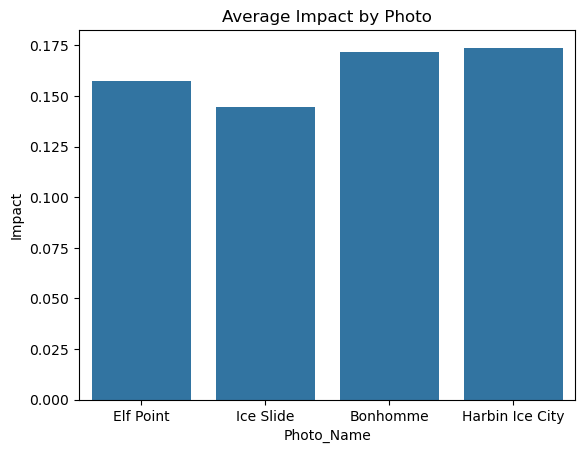

In [15]:
sns.barplot(x='Photo_Name', y='Impact', errorbar=None, data=ph);
plt.title('Average Impact by Photo');

Impact metric shows what rating each photo receives per second.

This barplot helps evaluate how efficiently each photo generates ratings relative to the time spent engaging with it. Although Elf Point and Ice Slide have the highest average Engagement Time and Ratings, their Impact is lower compared to Bonhomme and Harbin Ice City. This is because Impact reflects the efficiency of each photo in generating ratings in relation to the time spent interacting with it.

For instance, while Elf Point and Ice Slide might receive high ratings and have longer engagement times, they require more time to achieve these ratings, leading to a lower Impact score. In contrast, Bonhomme and Harbin Ice City, despite having slightly lower ratings and shorter engagement times, are more efficient in generating high ratings with less time spent, resulting in higher Impact values.

This means that a higher Impact indicates that a photo is better at achieving high ratings in a shorter amount of time, whereas a lower Impact suggests that the photo requires more engagement time to reach similar ratings. Therefore, according to the barplot results, Bonhomme and Harbin Ice City are more efficient at engaging recipients compared to Elf Point and Ice Slide.

 

# Generating t-tests

# 1. Anova

Since the dataset has 4 photos, it is better to start with ANOVA test before doing the t-tests.

The ANOVA test will tell if there is at least one photo that differs significantly from the others in terms of Impact.

**Null Hypothesis:**
There is no significant difference in Impact between the four photos.

**Alternative Hypothesis:**
At least one of the photos has a significantly different Impact.

If the p-value from the ANOVA test is below p-value (0.05), the null hypothesis is rejected and there is the conclusion that there is a statistically significant difference in Impact between the four photos.

In [20]:
f_stat, p_value = stats.f_oneway(
    ph.loc[ph['Photo_Name'] == 'Bonhomme', 'Impact'],
    ph.loc[ph['Photo_Name'] == 'Elf Point', 'Impact'],
    ph.loc[ph['Photo_Name'] == 'Harbin Ice City', 'Impact'],
    ph.loc[ph['Photo_Name'] == 'Ice Slide', 'Impact']
)


print(f'ANOVA test results:')
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

ANOVA test results:
F-statistic: 6.166704947172455
P-value: 0.0003642535457064892


The p-value is lower than 0.05, so the photos have statistically significant difference. T-tests will help to determine which photos are different.

# 2. T-tests

**Null Hypothesis:** There is no difference in the mean Impact scores between the two photos.

**Alternative Hypothesis:** There is a difference in the mean Impact scores between the two photos.

When performing multiple comparisons (for each pair of photos), the likelihood of finding a false positive increases due to the multiple tests. To correct for this, the Bonferroni correction helps.

Bonferroni correction threshold is: 0.05/6=0.0083 (new threshold). Divided by 6 because will have 6 tests/comparisons.

In [25]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Elf Point', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Ice Slide', 'Impact'].values,
    equal_var=False )
print('Elf Point vs.Ice Slide')
print('t-test:', t)
print('p-value:',p)

Elf Point vs.Ice Slide
t-test: 2.1460189193610817
p-value: 0.032176818826623106


Fail to reject

In [27]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Elf Point', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Bonhomme', 'Impact'].values,
    equal_var=False )
print('Elf Point vs.Bonhomme')
print('t-test:', t)
print('p-value:',p)

Elf Point vs.Bonhomme
t-test: -1.6896181097457026
p-value: 0.09158537695037049


Fail to reject

In [29]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Elf Point', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Harbin Ice City', 'Impact'].values,
    equal_var=False )
print('Elf Point vs. Harbin Ice City')
print('t-test:', t)
print('p-value:',p)

Elf Point vs. Harbin Ice City
t-test: -2.067762845115447
p-value: 0.0390373003748712


Fail to reject

In [31]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Bonhomme', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Ice Slide', 'Impact'].values,
    equal_var=False )
print('Bonhomme vs.Ice Slide')
print('t-test:', t)
print('p-value:',p)

Bonhomme vs.Ice Slide
t-test: 3.3582870064145434
p-value: 0.0008332046821906427


Reject

In [33]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Harbin Ice City', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Ice Slide', 'Impact'].values,
    equal_var=False )
print('Harbin Ice City vs.Ice Slide')
print('t-test:', t)
print('p-value:',p)

Harbin Ice City vs.Ice Slide
t-test: 3.848494731146451
p-value: 0.0001305391622767858


Reject

In [35]:
t, p = stats.ttest_ind(
    ph.loc[ph['Photo_Name'] == 'Bonhomme', 'Impact'].values,
    ph.loc[ph['Photo_Name'] == 'Harbin Ice City', 'Impact'].values,
    equal_var=False )
print('Bonhomme vs. Harbin Ice City')
print('t-test:', t)
print('p-value:',p)

Bonhomme vs. Harbin Ice City
t-test: -0.23716771223358002
p-value: 0.8125916050890718


Fail to reject

Bonhomme vs Ice Slide and Harbin Ice City vs Ice Slide show statistically significant differences in Impact, indicating that "Ice Slide" has a notably different (higher or lower) Impact compared to the other two photos.

For the other comparisons (Elf Point vs. Ice Slide, Elf Point vs Bonhomme, Elf Point vs Harbin Ice City, and Bonhomme vs Harbin Ice City), the differences are not statistically significant after correcting for multiple tests (Bonferroni correction). This suggests that Impact does not vary meaningfully between these photos.

However, if look at the results of p-values where the Null hypothesis was failed to rejected, only one p-value is really high (Bonhomme vs. Harbin Ice City). In other cases, p-value is not that high. Yes, they are higher than corrected p-value (0.0083): Elf Point vs Bonhomme, but some of them are lower than usual p-value (0.05): Elf Point vs Ice Slide and Elf Point vs Harbin Ice City.



The t-tests for the Impact metric show that Ice Slide performs significantly differently compared to Bonhomme and Harbin Ice City, making it stand out in terms of rating per second of engagement. However, the results for Elf Point are less clear, with some p-values being close to the usual threshold but not meeting the stricter corrected value.

It's too early to decide which photo to choose based only on Impact. The chi-square test, which looks at how well each photo drives conversions, is a more direct measure of audience response. It’s best to combine the results of both tests before making a final decision.

# Chi-Square

In [40]:
ph.head()

,Email_ID,Photo_Name,Open_Rate,Click_Through_Rate,Conversion,Engagement_Time,Bounce_Rate,Recipient_Age_Group,Device_Type,Photo_Rating,Time_of_Day,Season_Pass_Holder,Impact
0,1,Elf Point,No,Yes,No,73.0,Yes,45-54,Desktop,8,Morning,Yes,0.109589
1,2,Elf Point,Yes,Yes,Yes,30.8,Yes,45-54,Mobile,10,Afternoon,Yes,0.324675
2,3,Ice Slide,Yes,No,No,107.7,No,45-54,Tablet,7,Evening,No,0.064995
3,4,Bonhomme,Yes,Yes,Yes,37.2,Yes,25-34,Desktop,4,Morning,Yes,0.107527
4,5,Bonhomme,No,Yes,No,81.6,Yes,45-54,Desktop,4,Morning,No,0.049020


For the Chi-Square was chosen Conversion Metric. This variable directly measures the desired outcome of the campaign: whether recipients took the target action, such as signing up for email updates about the Enchanted Winter Carnival. Unlike engagement time or rating, conversion reflects actual behavioral commitment and the success of each photo in driving meaningful results.

Also it is important to set the **Null Hypothesis:** There is no significant difference in the conversion rates between the four photos. In other words, all photos have the same probability of leading to a conversion, and any differences observed in the data are due to variability rather than any meaningful pattern.

**Alternative Hypothesis:** There is significant difference in the conversion rates between the four photos.

In [42]:
ph['Conversion'] = ph['Conversion'].map({'Yes': 1, 'No': 0})

In [43]:
ph_c = ph['Conversion'].sum()
print ('observed values:', ph_c)

observed values: 807


In [44]:
total_ph=ph.shape[0]
print('total:', total_ph)

total: 1560


In [45]:
conversion_proportion= ph_c/total_ph
conversion_proportion

0.5173076923076924

The proportion in this Chi-Square test is used because this allows to fairly compare conversion rates across the four photo groups, even though the total number of emails sent for each photo may differ. By calculating expected conversions based on the overall conversion proportion, it helps to ensure that the comparisons are adjusted for differences in sample sizes.

In [47]:
total_Bonhomme = ph[ph['Photo_Name'] == 'Bonhomme'].shape[0]
total_Elf = ph[ph['Photo_Name'] == 'Elf Point'].shape[0]
total_Harbin = ph[ph['Photo_Name'] == 'Harbin Ice City'].shape[0]
total_IceSlide = ph[ph['Photo_Name'] == 'Ice Slide'].shape[0]

In [48]:
expected_B = total_Bonhomme * conversion_proportion
expected_E = total_Elf * conversion_proportion
expected_H = total_Harbin * conversion_proportion
expected_I = total_IceSlide * conversion_proportion

In [49]:
expected_counts = {
    'Photo_Name': ['Bonhomme', 'Elf Point', 'Harbin Ice City', 'Ice Slide'],
    'Total Conversion': [total_Bonhomme, total_Elf, total_Harbin, total_IceSlide],
    'Expected Conversion': [expected_B, expected_E, expected_H, expected_I]
}

In [50]:
exp_count = pd.DataFrame(expected_counts)
exp_count.head()

,Photo_Name,Total Conversion,Expected Conversion
0,Bonhomme,374,193.473077
1,Elf Point,387,200.198077
2,Harbin Ice City,382,197.611538
3,Ice Slide,417,215.717308


The table represents three columns: Photo Name, Total Conversion, and Expected Conversion. In order to calculate Chi-square Observed Conversion Column is necessary. It represents the **actual** number of conversions for each photo.

In [52]:
actual_B = ph[(ph['Photo_Name'] == 'Bonhomme') & (ph['Conversion'] == 1)].shape[0]
actual_E = ph[(ph['Photo_Name'] == 'Elf Point') & (ph['Conversion'] == 1)].shape[0]
actual_H = ph[(ph['Photo_Name'] == 'Harbin Ice City') & (ph['Conversion'] == 1)].shape[0]
actual_I = ph[(ph['Photo_Name'] == 'Ice Slide') & (ph['Conversion'] == 1)].shape[0]

In [53]:
actual_B

150

In [54]:
observed_values = [actual_B, actual_E, actual_H, actual_I]
expected_values = [expected_B, expected_E, expected_H, expected_I]

In [55]:
chi_square_stat, p_value = stats.chisquare(f_obs=observed_values, f_exp=expected_values)


In [56]:
chi_square_results = {
    'Photo Name': ['Bonhomme', 'Elf Point', 'Harbin Ice City', 'Ice Slide'],
    'Observed Conversion': observed_values,
    'Expected Conversion': expected_values,
    'Chi-Square Statistic': [chi_square_stat, chi_square_stat, chi_square_stat, chi_square_stat],
    'p-value': [p_value, p_value, p_value, p_value]
}

In [57]:
chi_square_results_df = pd.DataFrame(chi_square_results)
chi_square_results_df.head()

,Photo Name,Observed Conversion,Expected Conversion,Chi-Square Statistic,p-value
0,Bonhomme,150,193.473077,32.889473,3.398281e-07
1,Elf Point,222,200.198077,32.889473,3.398281e-07
2,Harbin Ice City,163,197.611538,32.889473,3.398281e-07
3,Ice Slide,272,215.717308,32.889473,3.398281e-07


The p-value is significantly lower than 0.05, so the Null Hypothesis is rejected. It means that there is significant difference in the conversion rates between the four photos. Therefore, the photo choice does affect whether recipients decide to take the desired action (such as signing up for email updates), and the differences in conversions are unlikely to be due to random chance.


# Final Decision

Based on the statistical analysis, the final decision is to choose 'Ice Slide' for the 2024 Enchanted Winter Carnival marketing campaign.

Chi-Square Test: The chi-square test indicated significant differences in conversion rates across the four photos. 'Ice Slide' achieved the highest observed conversion rate, suggesting that it was the most effective in encouraging recipients to take the desired action (signing up for email updates). The Observed value (272) for 'Ice Slide' is much higher than its Expected value (216), further supporting its effectiveness.

Impact Metric: Although the Impact metric did not show the most significant differences when analyzed with t-tests,'Ice Slide' still demonstrated a higher conversion rate. This supports its selection as the most effective photo. Additionally, "Ice Slide" had high engagement time and ratings, meaning the photo not only captured the recipients' attention for a longer duration but also received positive feedback.

Thus, 'Ice Slide' emerges as the most successful photo in driving conversions and engagement, making it the best choice for Lobster Land's marketing campaign.